### **Practical example on minset dataset**

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [157]:
df = pd.read_csv('C:/Users/Acer/OneDrive/Documents/MACLEARNING/machinelearning/data/train.csv')

In [158]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


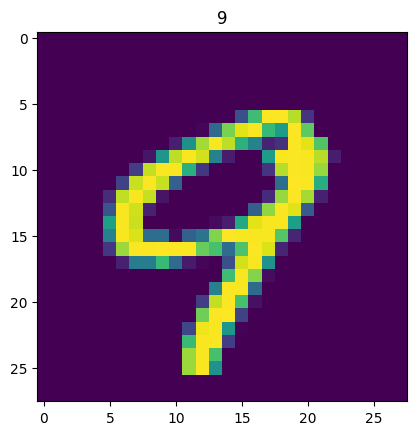

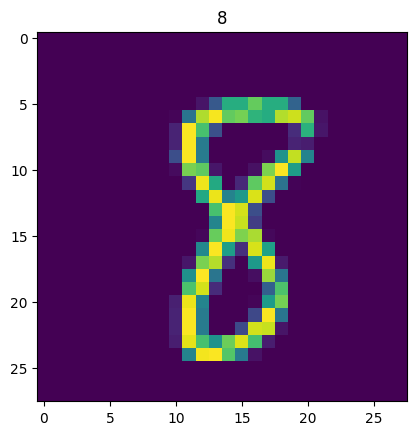

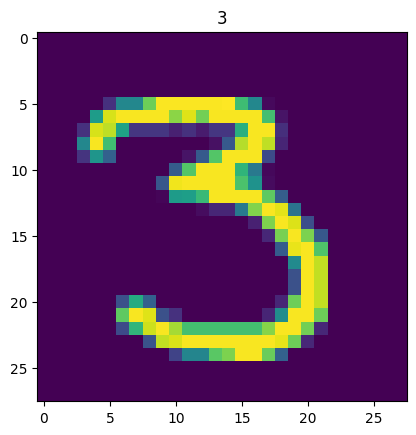

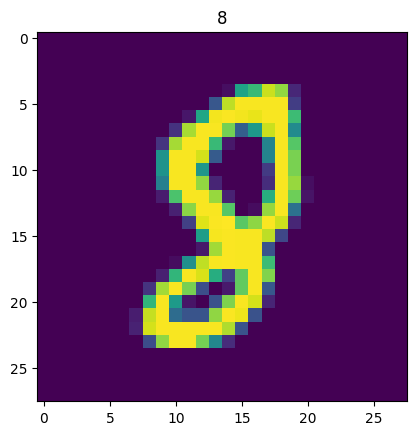

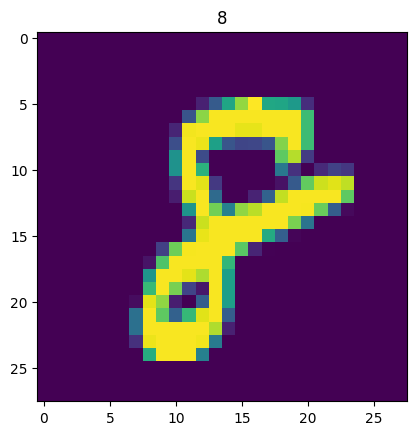

In [159]:
#to visualize the images with the pixel intensity as in the dataset
for i in [100,222,334,2032,894]:
    plt.imshow(df.iloc[i,1:].values.reshape(28,28))
    plt.title(f"{df.iloc[i,0]}")
    plt.show()

In [160]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

In [161]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y)

In [162]:
x_train.shape

(31500, 784)

In [163]:
#fitting the knn algorithm at the original data
from sklearn.neighbors import KNeighborsClassifier

In [164]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [165]:
y_pred=knn.predict(x_test)

In [166]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9646666666666667

In [167]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [168]:
x_train_trf=scaler.fit_transform(x_train)
x_test_trf=scaler.transform(x_test)

In [169]:
#trasnforming the dataset using pca
from sklearn.decomposition import PCA
pca=PCA(n_components=None)

In [170]:
X_train=pca.fit_transform(x_train_trf)
X_test=pca.transform(x_test_trf)

In [171]:
X_train.shape

(31500, 784)

In [172]:
#transforming the data using pca with the columns reduced to 100
pca2=PCA(n_components=100)
X_train2=pca2.fit_transform(x_train_trf)
X_test2=pca2.transform(x_test_trf)

In [173]:
X_train2.shape

(31500, 100)

In [174]:
knn2=KNeighborsClassifier()
knn2.fit(X_train2,y_train)
y_pred2=knn2.predict(X_test2)

In [175]:
accuracy_score(y_pred2,y_test)

0.9544761904761905

When the knn algorithm is fitted on the transformed data, time to predict reduced drastrically but the accuracy score didnot change.

In [176]:
acc_score={}
for i in range(1,785):
    pca=PCA(n_components=i)
    x_train2=pca.fit_transform(x_train_trf)
    x_test2=pca.transform(x_test_trf)
    knn=KNeighborsClassifier()
    knn.fit(x_train2,y_train)
    y_pred=knn.predict(x_test2)
    print(f'accuracy_score with {i}:',accuracy_score(y_pred,y_test))
    acc_score[i]=accuracy_score(y_pred,y_test)

accuracy_score with 1: 0.259047619047619
accuracy_score with 2: 0.32685714285714285
accuracy_score with 3: 0.5095238095238095
accuracy_score with 4: 0.6645714285714286
accuracy_score with 5: 0.7381904761904762
accuracy_score with 6: 0.824952380952381
accuracy_score with 7: 0.8371428571428572
accuracy_score with 8: 0.8658095238095238
accuracy_score with 9: 0.8786666666666667
accuracy_score with 10: 0.9011428571428571
accuracy_score with 11: 0.9093333333333333
accuracy_score with 12: 0.9175238095238095
accuracy_score with 13: 0.9235238095238095
accuracy_score with 14: 0.9298095238095239
accuracy_score with 15: 0.9319047619047619
accuracy_score with 16: 0.9340952380952381
accuracy_score with 17: 0.9351428571428572
accuracy_score with 18: 0.9357142857142857
accuracy_score with 19: 0.940952380952381
accuracy_score with 20: 0.9421904761904762
accuracy_score with 21: 0.9412380952380952
accuracy_score with 22: 0.9411428571428572
accuracy_score with 23: 0.9420952380952381
accuracy_score with 24

KeyboardInterrupt: 

In [182]:
sorted_dict_by_items = dict(sorted(acc_score.items(), key=lambda item: item[1]))

In [183]:
sorted_dict_by_items

{1: 0.259047619047619,
 2: 0.32685714285714285,
 3: 0.5095238095238095,
 4: 0.6645714285714286,
 5: 0.7381904761904762,
 6: 0.824952380952381,
 7: 0.8371428571428572,
 8: 0.8658095238095238,
 9: 0.8786666666666667,
 10: 0.9011428571428571,
 11: 0.9093333333333333,
 12: 0.9175238095238095,
 13: 0.9235238095238095,
 14: 0.9298095238095239,
 15: 0.9319047619047619,
 16: 0.9340952380952381,
 17: 0.9351428571428572,
 18: 0.9357142857142857,
 575: 0.94,
 550: 0.9400952380952381,
 564: 0.9400952380952381,
 569: 0.9400952380952381,
 570: 0.9400952380952381,
 571: 0.9400952380952381,
 572: 0.9400952380952381,
 573: 0.9400952380952381,
 574: 0.9400952380952381,
 519: 0.9401904761904762,
 520: 0.9401904761904762,
 551: 0.9401904761904762,
 563: 0.9401904761904762,
 565: 0.9401904761904762,
 517: 0.9402857142857143,
 531: 0.9402857142857143,
 552: 0.9402857142857143,
 553: 0.9402857142857143,
 561: 0.9402857142857143,
 562: 0.9402857142857143,
 566: 0.9402857142857143,
 567: 0.9402857142857143,
 5

In [186]:
#finding the feature counts to get best model
max_key = max(acc_score, key=acc_score.get)
print("Highest value in acc_score:", max_value)
print("Key with highest value:", max_key)

Highest value in acc_score: 0.955047619047619
Key with highest value: 97


In [187]:
pca=PCA(n_components=2)
x_train2=pca.fit_transform(x_train_trf)
x_test2=pca.transform(x_test_trf)

<Axes: >

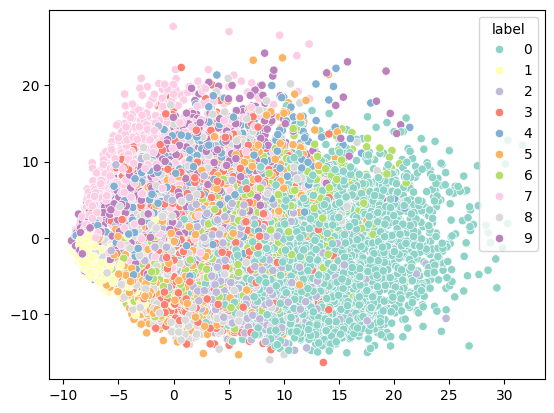

In [192]:
import seaborn as sns
sns.scatterplot(x=x_train2[:,0],y=x_train2[:,1],hue=y_train,palette='Set3')

In [193]:
pca=PCA(n_components=3)
x_train2=pca.fit_transform(x_train_trf)
x_test2=pca.transform(x_test_trf)

In [195]:
y_train=y_train.astype(str)
import plotly.express as px
fig=px.scatter_3d(df,x=x_train2[:,0],y=x_train2[:,1],z=x_train2[:,2],color=y_train)
fig.show()

We can see that the distinct digits such as 7 ,2 and 0 are distinct in the 3d plot.

In [200]:
pca.explained_variance_
#eigen values

array([40.67265646, 29.2138508 , 26.80892827])

In [201]:
pca.components_


array([[-0., -0., -0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ..., -0., -0., -0.]])

In [202]:
pca.components_
#eigen vectors

array([[-0., -0., -0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ..., -0., -0., -0.]])

**Finding the optimal number of the components**

The components upto which the sum of the variene is 100% are tatken as the optimal number of the componentes.

In [204]:
pca.explained_variance_ratio_*100

array([5.8019066 , 4.16732145, 3.82426208])

In [ ]:
#we see these three explains only 12% of the varience

In [208]:
pca=PCA(n_components=i)
x_train2=pca.fit_transform(x_train_trf)
x_test2=pca.transform(x_test_trf) 

In [209]:
pca.explained_variance_.shape

(576,)

In [210]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05801907, 0.09969228, 0.1379349 , 0.1674985 , 0.1934949 ,
       0.21604336, 0.23581058, 0.2537729 , 0.26959111, 0.28403522,
       0.29772959, 0.31013425, 0.32161149, 0.33290239, 0.34355075,
       0.3537622 , 0.36340126, 0.37280188, 0.38194191, 0.39092869,
       0.39940374, 0.40765989, 0.41552794, 0.42314433, 0.4305658 ,
       0.43766641, 0.44465332, 0.45138062, 0.45783211, 0.46414085,
       0.47024925, 0.47631831, 0.48220383, 0.48800083, 0.49371234,
       0.49927533, 0.50473749, 0.51002337, 0.51514582, 0.52012458,
       0.5250496 , 0.52994657, 0.53466738, 0.53936256, 0.54393807,
       0.54849108, 0.55299059, 0.55746428, 0.56191793, 0.56628351,
       0.57053516, 0.57473719, 0.5787852 , 0.58280609, 0.58678242,
       0.59068484, 0.59453037, 0.59831299, 0.60203705, 0.60572326,
       0.60932221, 0.61284642, 0.61630713, 0.61973096, 0.62315023,
       0.62652248, 0.62981328, 0.63304521, 0.63625558, 0.63945472,
       0.64261287, 0.64574499, 0.64884064, 0.65189206, 0.65491

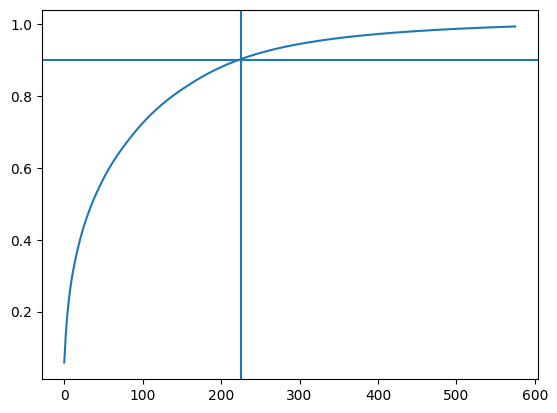

In [214]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(xmin=0,xmax=500,y=0.9)
plt.axvline(ymin=0,ymax=1,x=225)

In [215]:
#here around 225 pca components the its explains 90% of the total varience.

**When PCA doesnot work?**

![image](pca3.png)